In [1]:
#in case of not having this package
#! pip install pillow

In [76]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from os.path import join
import pandas as pd
import cv2
from scipy.linalg import eigh
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



first of all we use the first 5 pictures of each class for feature extraction using PCA . \
In other words we use the first 5 pictures for dimentionality reduction using PCA . \
Note that the dataset has 40 classes with 10 pictures so it has 400 images or instance. \
pictures' dimensions are 1024 by 1024 so we resize them to 32 by 32 to get 1024 pixels or features

In [54]:
data_folder = "att_faces/s"

def ReadFile(num,index):
    file_path = join(data_folder + str(num), str(index) + ".pgm")
    loaded_image=np.array(plt.imread(file_path))
    image_32x32 = cv2.resize(loaded_image, (32, 32), interpolation=cv2.IMREAD_GRAYSCALE)
    image_1024 = image_32x32.reshape(-1)
    return image_1024
    

## Use first 5 sample of each person

In [135]:

y_train = []
y_test = []

X_train = np.array([],dtype=int)
X_test = np.array([],dtype=int)

for num in range(1,41):
    #trainList = np.random.choice(range(1,11), 5, replace=False)
    trainList = np.array([1,2,3,4,5])
    testList = np.array([6,7,8,9,10])
    
    for index in trainList:
        image_1024 = ReadFile(num,index)
        X_train = np.concatenate((X_train,image_1024),axis=0)
        y_train.append(num)
        
    for index in testList:
        image_1024 = ReadFile(num,index)
        X_test = np.concatenate((X_test,image_1024),axis=0)
        y_test.append(num)
        
X_train = np.reshape(X_train,(200,1024)).T
X_test = np.reshape(X_test,(200,1024)).T


y_train = np.array(y_train)
y_test = np.array(y_test)
print("shape of X_train: ",np.shape(X_train)) #(1024,200)   

### Standardized

stScaler = StandardScaler()

standardized_X_train = stScaler.fit_transform(X_train)

standardized_X_test = stScaler.transform(X_test)
# print("variance of features: \n",np.var(standardized_data,axis=0)) # [1,...,1]

R_x = np.cov(standardized_X_train)
# print('\n\n shape of Covariance Matrix :\n',R_x.shape) # (1024,1024)
accuracies=[]
number_of_features = range(5,200,5)
for number_of_feature in number_of_features:
    eigen_values, eigen_vectors = eigh(R_x, eigvals=(1024-number_of_feature,1023))
    # print('\nMax %d Eigen Values : \n' %number_of_feature ,eigen_values)
    transform_matris = eigen_vectors
    # print('Shape of selsected Eigen Vectors : ',transform_matris.shape) #(1024,5)

    reduced_X_train = np.matmul(transform_matris.T,standardized_X_train).T
    reduced_X_test = np.matmul(transform_matris.T,standardized_X_test).T
    # print('\nShape of reduced X_train: ',reduced_X_train.shape) # (200,5)
    # print('\nShape of reduced X_train: ',reduced_X_test.shape) # (200,5)


    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(reduced_X_train, y_train)
    y_pred = knn.predict(reduced_X_test)
    accuracies.append(accuracy_score(y_test, y_pred)*100)
    print("accuray on %d features is %.2f" % (number_of_feature ,(accuracy_score(y_test, y_pred)*100)))

number_of_features_in_static_trainlist = number_of_features
accuracies_in_static_trainlist = accuracies
   

shape of X_train:  (1024, 200)
accuray on 5 features is 58.50
accuray on 10 features is 80.00
accuray on 15 features is 79.00
accuray on 20 features is 82.00
accuray on 25 features is 83.00
accuray on 30 features is 83.50
accuray on 35 features is 84.00
accuray on 40 features is 83.00
accuray on 45 features is 83.50
accuray on 50 features is 84.00
accuray on 55 features is 84.50
accuray on 60 features is 84.00
accuray on 65 features is 83.00
accuray on 70 features is 84.00
accuray on 75 features is 83.50
accuray on 80 features is 83.50
accuray on 85 features is 83.50
accuray on 90 features is 83.50
accuray on 95 features is 83.50
accuray on 100 features is 83.50
accuray on 105 features is 83.50
accuray on 110 features is 83.00
accuray on 115 features is 82.50
accuray on 120 features is 82.50
accuray on 125 features is 82.00
accuray on 130 features is 81.50
accuray on 135 features is 81.50
accuray on 140 features is 81.00
accuray on 145 features is 82.50
accuray on 150 features is 81.50

[58.5, 80.0, 79.0, 82.0, 83.0, 83.5, 84.0, 83.0, 83.5, 84.0, 84.5, 84.0, 83.0, 84.0, 83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.0, 82.5, 82.5, 82.0, 81.5, 81.5, 81.0, 82.5, 81.5, 81.5, 82.0, 81.5, 81.0, 81.5, 82.0, 82.0, 82.0, 82.5]


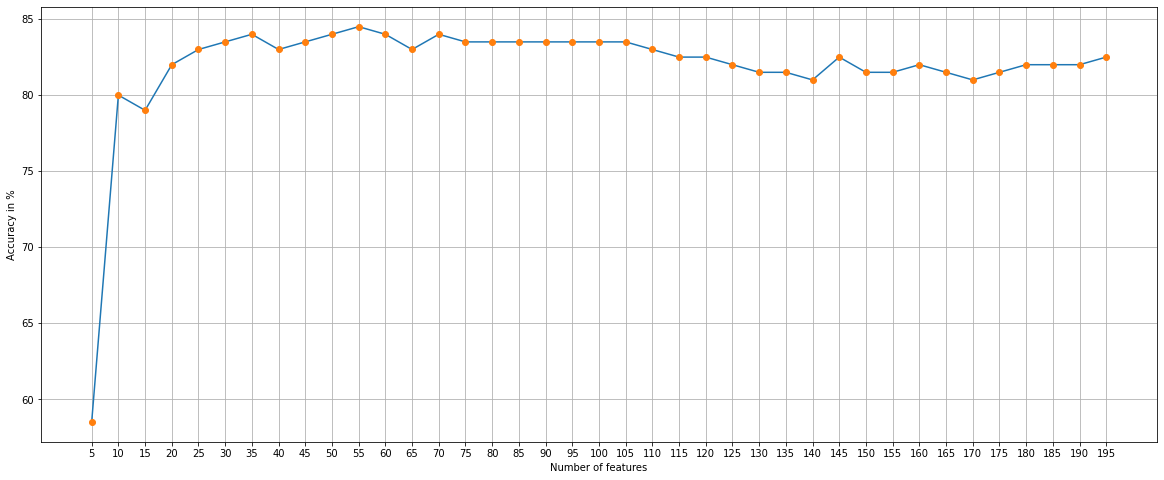

In [137]:
print(accuracies_in_static_trainlist)

fig = plt.figure(figsize=(20,8))
plt.plot(number_of_features_in_static_trainlist,accuracies_in_static_trainlist)
plt.plot(number_of_features_in_static_trainlist,accuracies_in_static_trainlist,'o')
plt.xlabel("Number of features")
plt.ylabel("Accuracy in %")
plt.xticks(number_of_features)
plt.grid()
plt.show()



# print(y_train.shape)
# print(X_train[:,0])
        

## Use 5 sample of each person randomly for 20 times